In [1]:
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

STOP_GRADIENT_DESCENT_PERCENTAGE = 1e-3

def CalculateMSE(x_positions, y_positions, w0, w1):
    """Calculate Mean Squared Error of Linear model degree 1"""
    n = len(x_positions)
    MSE = 0
    for i in range(0, n):
        MSE += (w0 + w1*x_positions[i] - y_positions[i]) ** 2
    MSE *= 1/(2*n)
    return MSE

def GradientDescent(x_positions, y_positions, a, w0, w1):
    """Do the Gradient Descent one time"""
    n = len(x_positions)
    w0_new = w0
    w1_new = w1
    for i in range(0,n): 
        w0_new -= (a / n) * (w0 + w1*x_positions[i] - y_positions[i])
        w1_new -= (a / n) * (w0 + w1*x_positions[i] - y_positions[i]) * x_positions[i]
    return (w0_new ,w1_new)

def Standardize(points):
    """Standardize all the points to have mean = 0"""
    points = np.array(points)
    mean = np.average(points)
    n = len(points)
    temp = 0
    for i in range(0,n):
        temp += (points[i] - mean) ** 2
    std = math.sqrt(temp / (n-1))
    new_points = (points - mean) / std
    return np.array(new_points)

def Standardize_input(points, input_value):
    """
    Standardize the input before
    predict with standardize model.
    """
    points = np.array(points)
    mean = np.average(points)
    n = len(points)
    temp = 0
    for i in range(0,n):
        temp += (points[i] - mean) ** 2
    std = math.sqrt(temp / (n-1))
    input_standardize = (input_value - mean) / std
    return input_standardize

def difference_percent(old_value, new_value):
    """Calculte difference of old and new value return in percent"""
    return ((old_value - new_value)/old_value) * 100

def NormalEquation(matX, vecY):
    """Do the gradient descent with matrix as input"""
    X_transpose = np.transpose(matX)

    left_side = np.dot(X_transpose,matX)
    right_side = np.dot(X_transpose,vecY)

    ans = np.linalg.inv(left_side).dot(right_side)
    return ans

def gradient_descent_matrix(x_position, y_position, learning, ans):
    """Do the gradient descent with matrix as input"""
    n = len(x_position)
    X_trans = np.transpose(x_position)
    Xw = np.dot(x_position, ans)
    temp = np.dot(X_trans, (Xw - y_position))
    w_new = ans - (learning/n)*temp
    return w_new

# 1.เขียนโปรแกรมสำหรับสร้างแบบจำลองเชิงเส้นด้วยวิธีลดตามความชัน พร้อมทั้งแสดงฟังก์ชันค่าใช้จ่ายในรูปของคอนทัวร์และแสดงให้เห็นถึงขั้นตอนในการปรับพารามิเตอร์ (Lecture หน้าที่ 49)

## Data

In [2]:
# Load data from library
df = px.data.tips()
x_input = df['total_bill']
y_input = df['tip']

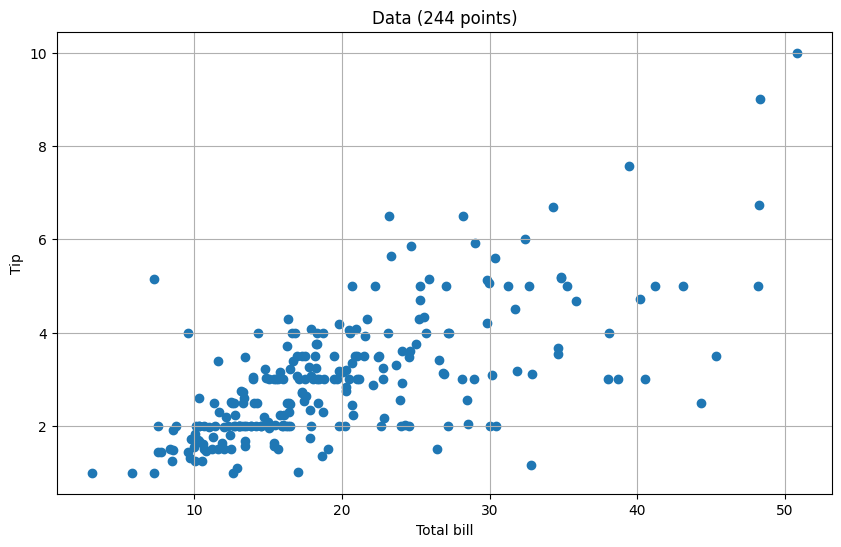

In [3]:
# Plot the data input
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.title(f"Data ({len(x_input)} points)")

plt.scatter(x_input, y_input)

plt.show()

## Gradient Descent

In [4]:
# Do the Gradient Descent

# Set starting parameter
a = 0.001
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_input, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_input, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_input, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

Count = 12
Result:
w0 = 1.004099572908144
w1 = 0.1014487398678875
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 1.1983401882957354, 0.7086444845703839, 0.5717338802626484, 0.5334558971032993, 0.522753891452087, 0.5197616529151385, 0.5189249321612793, 0.5186908570009237, 0.5186252711883808, 0.5186067921353391, 0.518601483366401, 0.518599856829123]
Final error: 0.518599856829123


## Contour plot

In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list) - 0.3*abs(min(w0_list)) if min(w0_list) != 0 else -0.01, max(w0_list)*1.2, 1000)
y = np.linspace(min(w1_list) - 0.3*abs(min(w1_list)) if min(w1_list) != 0 else -0.01, max(w1_list)*1.2, 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_input, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## Model line plot

Number of gradient: 0
w0 = 1
w1 = 0


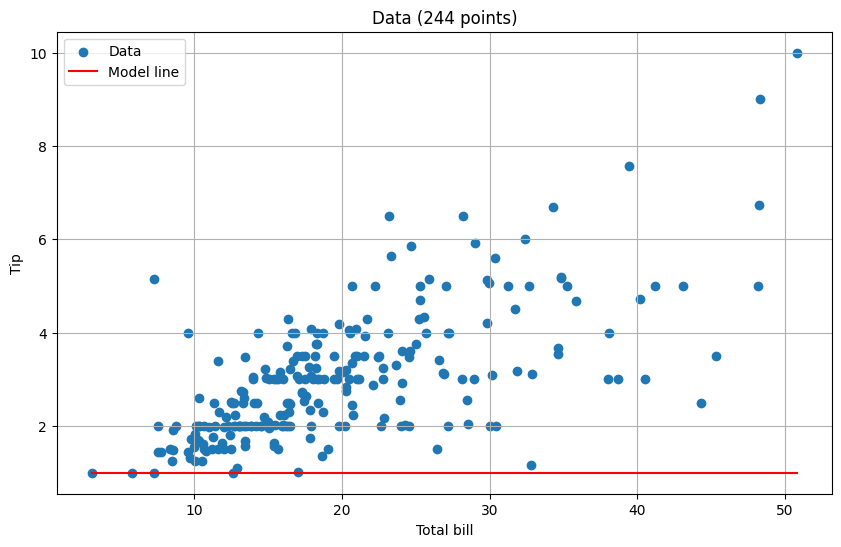

In [5]:
# Plot the model line at specific gradient time.
index_gradient = 0

print("Number of gradient:", index_gradient)
print("w0 =", w0_list[index_gradient])
print("w1 =", w1_list[index_gradient])

x_line = np.linspace(min(x_input), max(x_input), 100)
y_line = w1_list[index_gradient] * x_line + w0_list[index_gradient]

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.title(f"Data ({len(x_input)} points)")

plt.scatter(x_input, y_input, label="Data")
plt.plot(x_line, y_line, color='r', label="Model line")

plt.legend()
plt.show()

Number of gradient: 2
w0 = 1.003048252538985
w1 = 0.07311641484764073


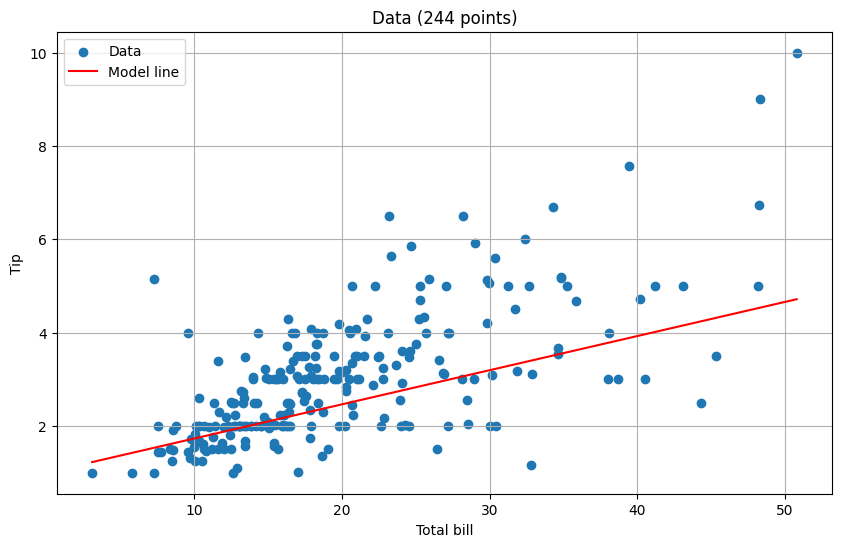

In [6]:
# Plot the model line at specific gradient time.
index_gradient = 2

print("Number of gradient:", index_gradient)
print("w0 =", w0_list[index_gradient])
print("w1 =", w1_list[index_gradient])

x_line = np.linspace(min(x_input), max(x_input), 100)
y_line = w1_list[index_gradient] * x_line + w0_list[index_gradient]

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.title(f"Data ({len(x_input)} points)")

plt.scatter(x_input, y_input, label="Data")
plt.plot(x_line, y_line, color='r', label="Model line")

plt.legend()
plt.show()

Number of gradient: 12
w0 = 1.004099572908144
w1 = 0.1014487398678875


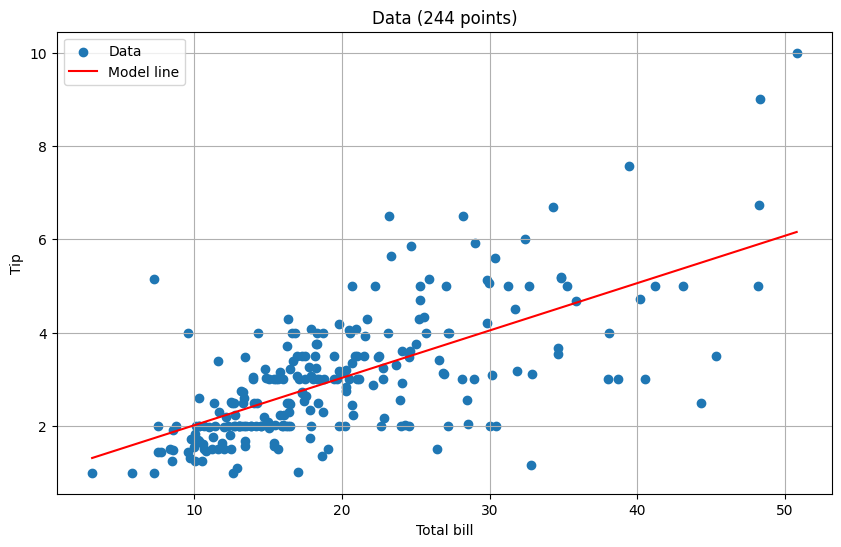

In [7]:
# Plot the model line at specific gradient time.
index_gradient = count

print("Number of gradient:", index_gradient)
print("w0 =", w0_list[index_gradient])
print("w1 =", w1_list[index_gradient])

x_line = np.linspace(min(x_input), max(x_input), 100)
y_line = w1_list[index_gradient] * x_line + w0_list[index_gradient]

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.title(f"Data ({len(x_input)} points)")

plt.scatter(x_input, y_input, label="Data")
plt.plot(x_line, y_line, color='r', label="Model line")

plt.legend()
plt.show()

# 2.เขียนโปรแกรมสำหรับแสดงผลกระทบต่อการทำงานของวิธีลดตามความชันและฟังก์ชันค่าใช้จ่าย เมื่อตัวแปร x หลายตัวมีค่าแตกต่างกันมาก และแสดงผลของการปรับปรุงประสิทธิภาพด้วยการทำให้เป็นมาตรฐาน (Lecture หน้าที่ 63)

## Data

In [8]:
# Load data from library
df = px.data.tips()
x_input = df['total_bill'] * 1000
y_input = df['tip']

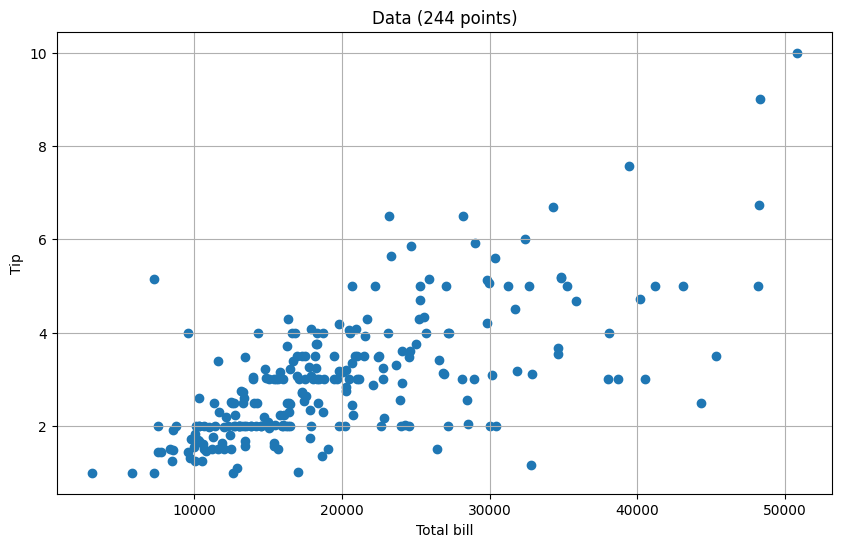

In [9]:
# Plot the data input
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.title(f"Data ({len(x_input)} points)")

plt.scatter(x_input, y_input)

plt.show()

## Without Standardization

### Gradient Descent
**The learning rate without standardization is very small (1e-9)**

In [10]:
# Do the Gradient Descent

# Set starting parameter
a = 1e-9
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_input, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_input, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_input, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

w0_without_standardization = w0
w1_without_standardization = w1

Count = 12
Result:
w0 = 1.0000000041137609
w1 = 0.00010162150132964321
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 1.200440323121343, 0.7097905378395116, 0.5721810286067024, 0.5335865410528926, 0.5227621839437194, 0.5197263434841944, 0.5188749000955721, 0.5186361010368025, 0.5185691265423025, 0.5185503426201267, 0.5185450744095763, 0.5185435968670331]
Final error: 0.5185435968670331


### Contour plot

In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_input, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## With Standardization

### Gradient Descent
**The learning rate is normal with standardization**

In [11]:
# Standardization x
x_standard = Standardize(x_input)

# Set starting parameter
a = 0.5
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_standard, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_standard, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_standard, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

w0_with_standardization = w0
w1_with_standardization = w1

Count = 11
Result:
w0 = 2.997302966508712
w1 = 0.9344939818506284
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 1.126866894303943, 0.6704493059071566, 0.5561764027343794, 0.5275657044158795, 0.520402324492716, 0.5186087811939077, 0.5181597152490308, 0.5180472773362227, 0.5180191246493698, 0.5180120755867702, 0.5180103105760359]
Final error: 0.5180103105760359


### Contour plot

In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_standard, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## Prediction with standardization
To be able to use standardization model, we need to standardize the input first

In [12]:
# Without standardization
x_input_value = 20000

# y = w0 + w1*x
y_output_without_std = w0_without_standardization + w1_without_standardization*x_input_value
y_output_with_std = w0_with_standardization + w1_with_standardization*Standardize_input(x_input, x_input_value)

print("Input:", x_input_value)
print("Output:")
print("Without Standardization:", y_output_without_std)
print("With Standardization:", y_output_with_std)

Input: 20000
Output:
Without Standardization: 3.032430030706625
With Standardization: 3.0197727569023205


# 3.เขียนโปรแกรมสำหรับแสดงผลของการปรับพารามิเตอร์การเรียนรู้ (Lecture หน้าที่ 66)

## Data

In [13]:
df = px.data.tips()
x_input = Standardize(df['total_bill'])
y_input = df['tip']

## Learning rate less than optimal
a = 0.001

In [14]:
# Standardization x
x_standard = Standardize(x_input)

# Set starting parameter
a = 0.001
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_standard, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_standard, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_standard, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

Count = 3422
Result:
w0 = 2.933152334455574
w1 = 0.9040688510153796
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 2.945005404247312, 2.9401573972077273, 2.9353190742522344, 2.9304904160364535, 2.925671403254644, 2.9208620166396195, 2.9160622369626954, 2.911272045033585, 2.90649142170033, 2.9017203478492517, 2.8969588044048304, 2.8922067723296667, 2.887464232624378, 2.88273116632754, 2.8780075545155985, 2.8732933783027987, 2.868588618841129, 2.863893257320209, 2.85920727496724, 2.854530653046916, 2.8498633728613685, 2.845205415750065, 2.8405567630897632, 2.835917396294408, 2.8312872968150793, 2.8266664461399045, 2.822054825793989, 2.8174524173393456, 2.8128592023748227, 2.8082751625360176, 2.803700279495215, 2.7991345349613073, 2.7945779106797244, 2.790030388432371, 2.7854919500375246, 2.7809625773497997, 2.7764422522600465, 2.7719309566952894, 2.7674286726186677, 2.7629353820293265, 2.75845106696239

In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_standard, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## Learning rate optimal
a = 1

In [15]:
# Standardization x
x_standard = Standardize(x_input)

# Set starting parameter
a = 1
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_standard, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_standard, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_standard, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

Count = 3
Result:
w0 = 2.9982786885245925
w1 = 0.9349714547536321
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 0.5180170324564954, 0.5180097211284957, 0.5180097210056905]
Final error: 0.5180097210056905


In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_standard, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## Learning rate more than optimal but less than 2 times optimal
a = 1.5

In [16]:
# Standardization x
x_standard = Standardize(x_input)

# Set starting parameter
a = 1.5
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_standard, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
while True:
    count += 1
    w0, w1 = GradientDescent(x_standard, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_standard, y_input, w0, w1)
    E_list.append(new_E)

    if difference_percent(old_E, new_E) < 0:
        print("The error is increasing")
        break
    elif difference_percent(old_E, new_E) < STOP_GRADIENT_DESCENT_PERCENTAGE:
        break
    old_E = new_E
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

Count = 11
Result:
w0 = 2.99925441054047
w1 = 0.935369963589529
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 1.123313529211767, 0.6686870371219817, 0.5555208540535319, 0.5273489218100359, 0.5203351113214933, 0.5185887736053538, 0.5181539244325302, 0.5180456353513979, 0.5180186662984133, 0.5180119492088603, 0.5180102760760902]
Final error: 0.5180102760760902


In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_standard, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

## Learning rate more than 2 times optimal
a = 2.1

In [17]:
# Standardization x
x_standard = Standardize(x_input)

# Set starting parameter
a = 2.1
w0 = 1
w1 = 0

# Create parameter list for plotting
w0_list = [w0]
w1_list = [w1]
old_E = CalculateMSE(x_standard, y_input, w0, w1)
E_list = [old_E]

# Do the Graident Descent untill stop.
count = 0
for i in range(10):
    count += 1
    w0, w1 = GradientDescent(x_standard, y_input, a, w0, w1)
    w0_list.append(w0)
    w1_list.append(w1)
    new_E = CalculateMSE(x_standard, y_input, w0, w1)
    E_list.append(new_E)
    
print("Count =", count)
print(f"Result:")
print(f"w0 = {w0}")
print(f"w1 = {w1}")
print("-"*100)
print(f"Error list:")
print(E_list)
print("Final error:", E_list[-1])

Count = 10
Result:
w0 = -2.184741593014577
w1 = -1.306905487287388
----------------------------------------------------------------------------------------------------
Error list:
[2.9498631147540975, 3.452342518673649, 4.058773377469828, 4.790685556520687, 5.67407286248021, 6.74031951282356, 8.027319069465216, 9.580825853557263, 11.456087185645028, 13.719814856485996, 16.45256639038106]
Final error: 16.45256639038106


In [ ]:
#Generate x and y values
x = np.linspace(min(w0_list), max(w0_list), 1000)
y = np.linspace(min(w1_list), max(w1_list), 1000)

#Create a grid of x and y values
X, Y = np.meshgrid(x, y)

#Evaluate the function at each (x, y) point
Z = CalculateMSE(x_standard, y_input, X, Y)

#Create the contour plot
fig = go.Figure(data=go.Contour(x=x, y=y, z=Z, contours_coloring='lines',line_width=2))

fig.add_traces(go.Scatter(x=w0_list, y=w1_list, mode = "markers"))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X',
    yaxis_title='Y',
)

fig.show()

# 4.เขียนโปรแกรมสำหรับเปรียบเทียบผลลัพธ์ที่ได้จากวิธีสมการปรกติและวิธีลดตามความชัน (Lecture หน้าที่ 57 และ 59)

In [18]:
"""
x = [[1,2015,497],
    [1,1584,356],
    [1,2469,556],
    [1,989,222]]
"""
x = [[2015,497],
    [1584,356],
    [2469,556],
    [989,222]]
y = [400,300,500,200]

X_before_standard = np.transpose(np.array(x))
new_x = [[1,1,1,1]]
for i in X_before_standard:
    new_x.append(Standardize(i))
    
X = np.array(new_x)
X = np.transpose(X)
Y = np.array(y)
print("X =\n", X)
print("Y =\n", Y)

X =
 [[ 1.          0.39762356  0.59666081]
 [ 1.         -0.2858291  -0.34596299]
 [ 1.          1.11754817  0.99109204]
 [ 1.         -1.22934263 -1.24178986]]
Y =
 [400 300 500 200]


In [19]:
W = np.array([0,0,0])
a = 1
for i in range(10000):
    W = gradient_descent_matrix(X, Y, a, W)
    
print("Gradient Descent :", W)
print("----------------------------------------------------")
print("Normal Equation :", NormalEquation(X, Y))

Gradient Descent : [350.         134.11044447  -5.4287512 ]
----------------------------------------------------
Normal Equation : [350.         134.11044447  -5.4287512 ]
